In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

june_temps_df = []
june_temps_df = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()


In [5]:
# 2. Convert the June temperatures to a list.

print(june_temps_df)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 

june_temps_df = pd.DataFrame(june_temps_df, columns=['Month','June Temps']).sort_index()
june_temps_df= june_temps_df.set_index('Month')
june_temps_df

,June Temps
Month,
2010-06-01,78.0
2010-06-02,76.0
2010-06-03,78.0
2010-06-04,76.0
2010-06-05,77.0
...,...
2017-06-26,79.0
2017-06-27,74.0
2017-06-28,74.0


In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

#dec_temps_df = []
#dec_temps_df = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= '2017-12-01', Measurement.date <= '2017-12-31').all()
dec_temps_df = []
dec_temps_df = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()


In [10]:
# 7. Convert the December temperatures to a list.

print(dec_temps_df)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps_df, columns=['Month','Dec Temps']).sort_index()
dec_temps_df = dec_temps_df.set_index('Month')
dec_temps_df

,Dec Temps
Month,
2010-12-01,76.0
2010-12-03,74.0
2010-12-04,74.0
2010-12-06,64.0
2010-12-07,64.0
...,...
2016-12-27,71.0
2016-12-28,71.0
2016-12-29,69.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# 10. Return to your challenge instructions to compare your summary statistics

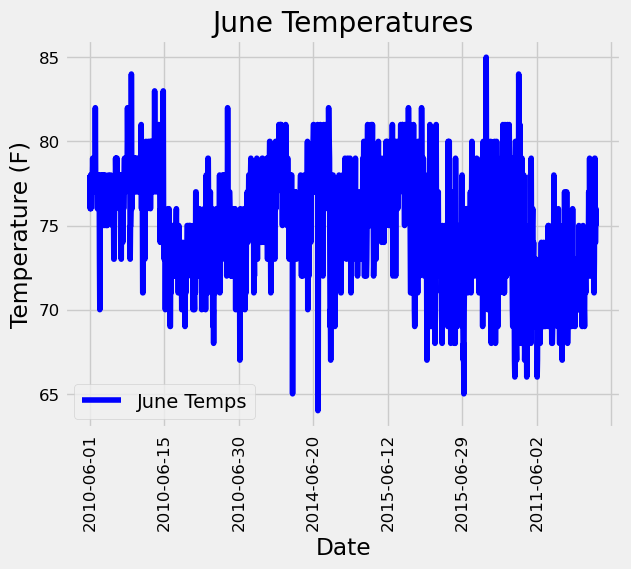

In [14]:
import matplotlib.pyplot as plt

# June Temperature graph
june_temps_df.plot(color="blue", fontsize = 12)
plt.title("June Temperatures")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.xticks(rotation = 90)
plt.savefig("june_temps_graph.png")

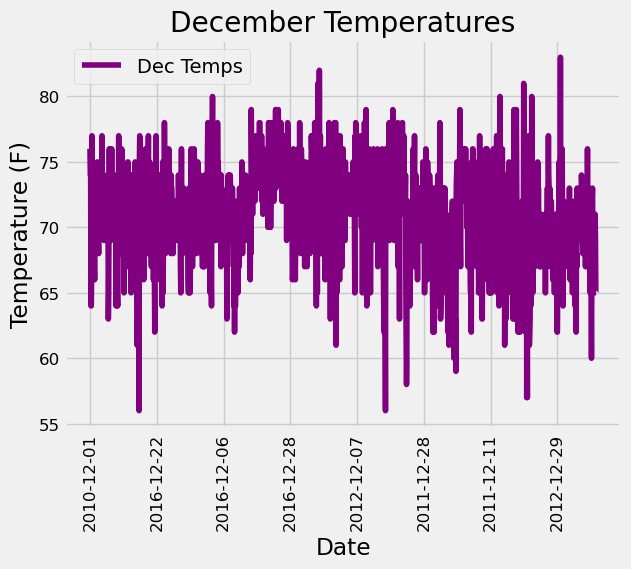

In [15]:
# December temperature graph
dec_temps_df.plot(color="purple", fontsize = 12)
plt.title("December Temperatures")
plt.xlabel("Date")
plt.ylabel("Temperature (F)")
plt.xticks(rotation = 90)
plt.savefig("dec_temps_graph.png")

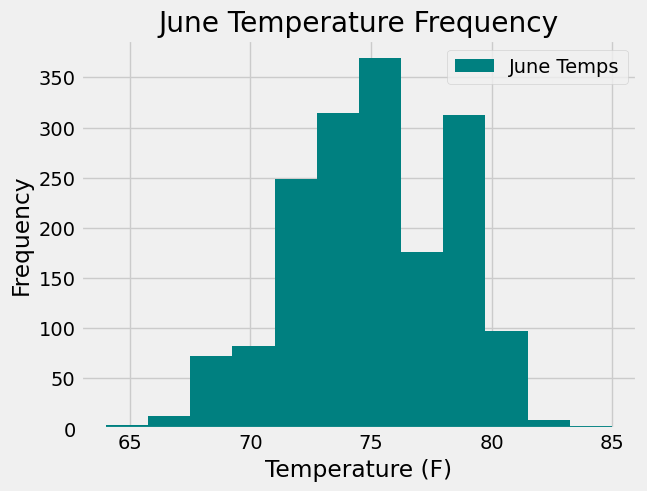

In [16]:
# June temperature frequency graph
june_temps_df.plot.hist(bins=12, color = "teal")
plt.title("June Temperature Frequency")
plt.xlabel("Temperature (F)")
plt.savefig("june_temps_freq_graph.png")

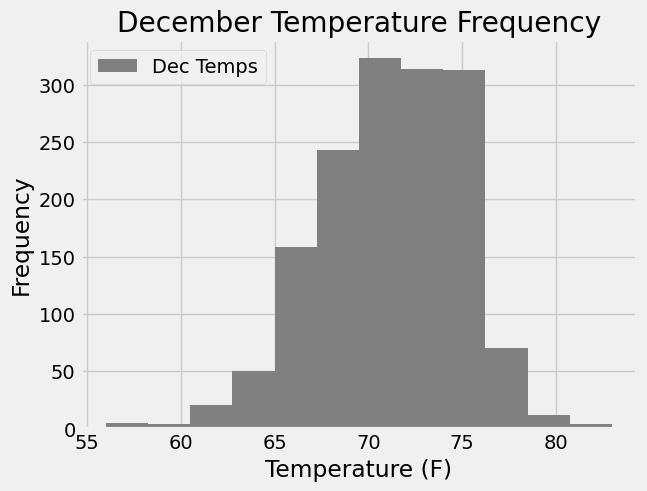

In [17]:
# December temperature frequency graph
dec_temps_df.plot.hist(bins=12, color = "gray")
plt.title("December Temperature Frequency")
plt.xlabel("Temperature (F)")
plt.savefig("dec_temps_freq_graph.png")

In [19]:
# June precipitation query
june_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
print(june_prcp)

[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

In [30]:
# June precipitation dataframe
june_prcp_df = pd.DataFrame(june_prcp, columns=['date','precipitation']).sort_index()
june_prcp_df.set_index(june_prcp_df['date'], inplace=True)
june_prcp_df

,date,precipitation
date,,
2010-06-01,2010-06-01,0.00
2010-06-02,2010-06-02,0.01
2010-06-03,2010-06-03,0.00
2010-06-04,2010-06-04,0.00
2010-06-05,2010-06-05,0.00
...,...,...
2017-06-26,2017-06-26,0.02
2017-06-27,2017-06-27,0.10
2017-06-28,2017-06-28,0.02


In [31]:
# June precipitation summary
june_prcp_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


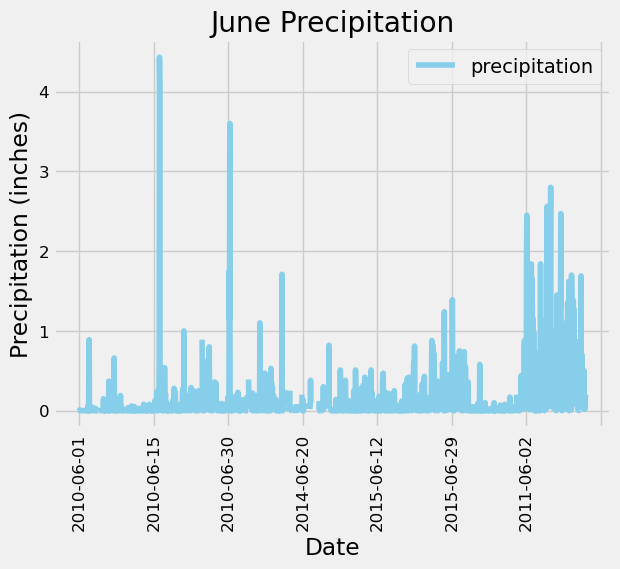

In [35]:
# June precipitation graph
june_prcp_df.plot(color="skyblue", fontsize = 12)
plt.title("June Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation = 90)
plt.savefig("june_prcp_graph.png")

In [36]:
# December precipitation query
dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
print(dec_prcp)

[('2010-12-01', 0.04), ('2010-12-03', 0.0), ('2010-12-04', 0.0), ('2010-12-06', 0.0), ('2010-12-07', 0.0), ('2010-12-08', 0.0), ('2010-12-09', 0.0), ('2010-12-10', 1.58), ('2010-12-11', 0.77), ('2010-12-12', 0.0), ('2010-12-13', 0.0), ('2010-12-14', 0.0), ('2010-12-15', 0.0), ('2010-12-16', 0.0), ('2010-12-17', 0.0), ('2010-12-18', 0.0), ('2010-12-19', 1.4), ('2010-12-23', 0.0), ('2010-12-24', 0.0), ('2010-12-26', None), ('2010-12-27', 0.13), ('2010-12-28', 0.55), ('2010-12-29', 0.06), ('2010-12-30', 0.01), ('2010-12-31', 0.0), ('2011-12-01', 0.03), ('2011-12-02', 0.08), ('2011-12-03', 0.0), ('2011-12-04', 0.0), ('2011-12-05', 0.0), ('2011-12-06', 0.0), ('2011-12-07', 0.0), ('2011-12-08', 0.0), ('2011-12-09', 0.13), ('2011-12-10', 0.07), ('2011-12-11', 0.07), ('2011-12-12', 0.08), ('2011-12-13', 0.4), ('2011-12-14', 0.7), ('2011-12-15', 0.0), ('2011-12-16', 0.01), ('2011-12-17', 0.07), ('2011-12-18', 0.02), ('2011-12-19', 0.15), ('2011-12-20', 0.02), ('2011-12-21', 0.18), ('2011-12-22'

In [37]:
# December precipitation dataframe
dec_prcp_df = pd.DataFrame(dec_prcp, columns=['date','precipitation']).sort_index()
dec_prcp_df.set_index(dec_prcp_df['date'], inplace=True)
dec_prcp_df

,date,precipitation
date,,
2010-12-01,2010-12-01,0.04
2010-12-03,2010-12-03,0.00
2010-12-04,2010-12-04,0.00
2010-12-06,2010-12-06,0.00
2010-12-07,2010-12-07,0.00
...,...,...
2016-12-27,2016-12-27,0.14
2016-12-28,2016-12-28,0.14
2016-12-29,2016-12-29,1.03


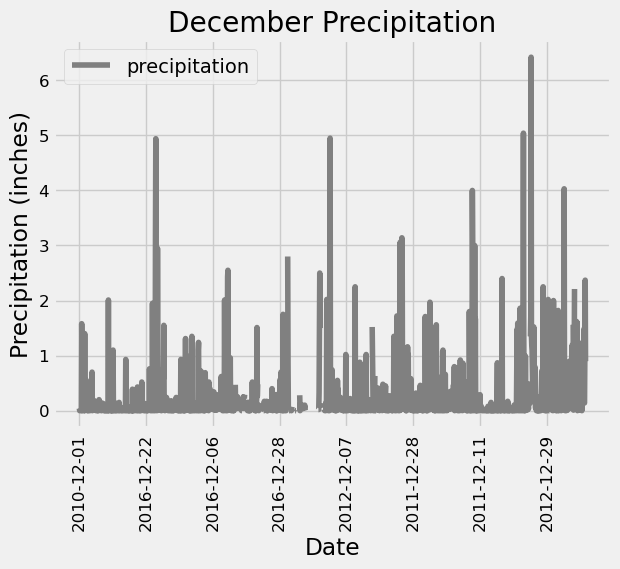

In [40]:
# December precipitation graph
dec_prcp_df.plot(color="gray", fontsize = 12)
plt.title("December Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation = 90)
plt.savefig("dec_prcp_graph.png")

In [46]:
# Correlation graph between June temperature and precipitation

# Query and Dataframe
june_temp_prcp = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
june_temp_prcp_df = pd.DataFrame(june_temp_prcp, columns=['June','temperature','precipitation']).sort_index()
june_temp_prcp_df

,June,temperature,precipitation
0,2010-06-01,78.0,0.00
1,2010-06-02,76.0,0.01
2,2010-06-03,78.0,0.00
3,2010-06-04,76.0,0.00
4,2010-06-05,77.0,0.00
...,...,...,...
1695,2017-06-26,79.0,0.02
1696,2017-06-27,74.0,0.10
1697,2017-06-28,74.0,0.02
1698,2017-06-29,76.0,0.04


In [47]:
# Correlation graph between June temperature and precipitation

# Query and Dataframe
dec_temp_prcp = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
dec_temp_prcp_df = pd.DataFrame(dec_temp_prcp, columns=['Dec','temperature','precipitation']).sort_index()
dec_temp_prcp_df

,Dec,temperature,precipitation
0,2010-12-01,76.0,0.04
1,2010-12-03,74.0,0.00
2,2010-12-04,74.0,0.00
3,2010-12-06,64.0,0.00
4,2010-12-07,64.0,0.00
...,...,...,...
1512,2016-12-27,71.0,0.14
1513,2016-12-28,71.0,0.14
1514,2016-12-29,69.0,1.03
1515,2016-12-30,65.0,2.37
